# Final Project
## Student: Jesus Montero 
## Dataset: 
[World Happiness Report 2020 (https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2020.csv)


---

## Hypothesis
*Social support and Freedom to make life choices are the most important factors to reduce negative affect in Latin American Countries.*

## Variables and brief explanation



*   Country name ()
*   Year()
*   Life Ladder(LL) -> National average response to the question of life evaluations
*   Log GDP per capita(GDP) ->  Purchase power
*   Social support(Support) -> Having someone to count on in times of trouble
*   Healthy life expectancy at birth (LifeExp)
*   Freedom to make life choices(Freedom) -> Are you satisfied or dissatisfied with your freedom to choose what
you do with your life? *italicized text*
*   Generosity(Generosity) -> *Have you donated money to a charity in the past month?*
*   Perceptions of corruption(Corruption) -> Is corruption widespread throughout
the government or not *italicized text* and “Is corruption widespread within businesses or
not? *italicized text*
*   Positive affect(PA)	-> happiness, laugh and enjoyment
*   Negative affect(NA) -> worry, sadness and anger






## Imports

In [23]:
import pandas as pd 
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import seaborn as sns #Graph library
from sklearn import model_selection, metrics
from scipy import stats

#####################################
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(20,8.27)})
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590","#ffb400","#e58637","#420c30"]
low_c = '#dd4124'
high_c = '#009473'
##Data Loading
HIR = pd.read_csv('Data/world-happiness-report.csv')
HIR.reset_index(drop=True) ##removes duplicated index
HIR.index.names = [None] ##removes index name
HIR.dropna(subset = ["Log GDP per capita"], inplace=True) ## some records have no GDP data and GDP will be used on the numerical modelling section
HIR.columns = ['Country','Year','LL', 'GDP', 'Support', 'LifeExp','Freedom','Generosity','Corruption','PA','NA'] 




## First view of global data

In [2]:
HIR.head()

Country  Year     LL    GDP  Support  LifeExp  Freedom  Generosity  \
0  Afghanistan  2008  3.724  7.370    0.451    50.80    0.718       0.168   
1  Afghanistan  2009  4.402  7.540    0.552    51.20    0.679       0.190   
2  Afghanistan  2010  4.758  7.647    0.539    51.60    0.600       0.121   
3  Afghanistan  2011  3.832  7.620    0.521    51.92    0.496       0.162   
4  Afghanistan  2012  3.783  7.705    0.521    52.24    0.531       0.236   

   Corruption     PA     NA  
0       0.882  0.518  0.258  
1       0.850  0.584  0.237  
2       0.707  0.618  0.275  
3       0.731  0.611  0.267  
4       0.776  0.710  0.268

In [3]:
NonlyHIR = HIR.drop(['Country', 'Year'], axis=1) ##Getting rid of non numerical data since I'll be analyzing possible corelations
NonlyHIR.describe()

LL          GDP      Support      LifeExp      Freedom  \
count  1913.000000  1913.000000  1900.000000  1876.000000  1881.000000   
mean      5.474110     9.368453     0.813150    63.391990     0.743220   
std       1.117127     1.154084     0.118428     7.490351     0.141886   
min       2.375000     6.635000     0.290000    32.300000     0.258000   
25%       4.641000     8.464000     0.749750    58.700000     0.649000   
50%       5.389000     9.460000     0.836000    65.200000     0.764000   
75%       6.296000    10.353000     0.906000    68.600000     0.857000   
max       8.019000    11.648000     0.987000    77.100000     0.985000   

        Generosity   Corruption           PA           NA  
count  1860.000000  1804.000000  1891.000000  1897.000000  
mean      0.000103     0.748525     0.710519     0.267887  
std       0.162215     0.187082     0.106842     0.083806  
min      -0.335000     0.035000     0.322000     0.094000  
25%      -0.113000     0.691000     0.627500     0.206000  
50%      -0.025500     0.804000     0.723000     0.257000  
75%       0.091000     0.874000     0.799500     0.319000  
max       0.698000     0.983000     0.944000     0.705000

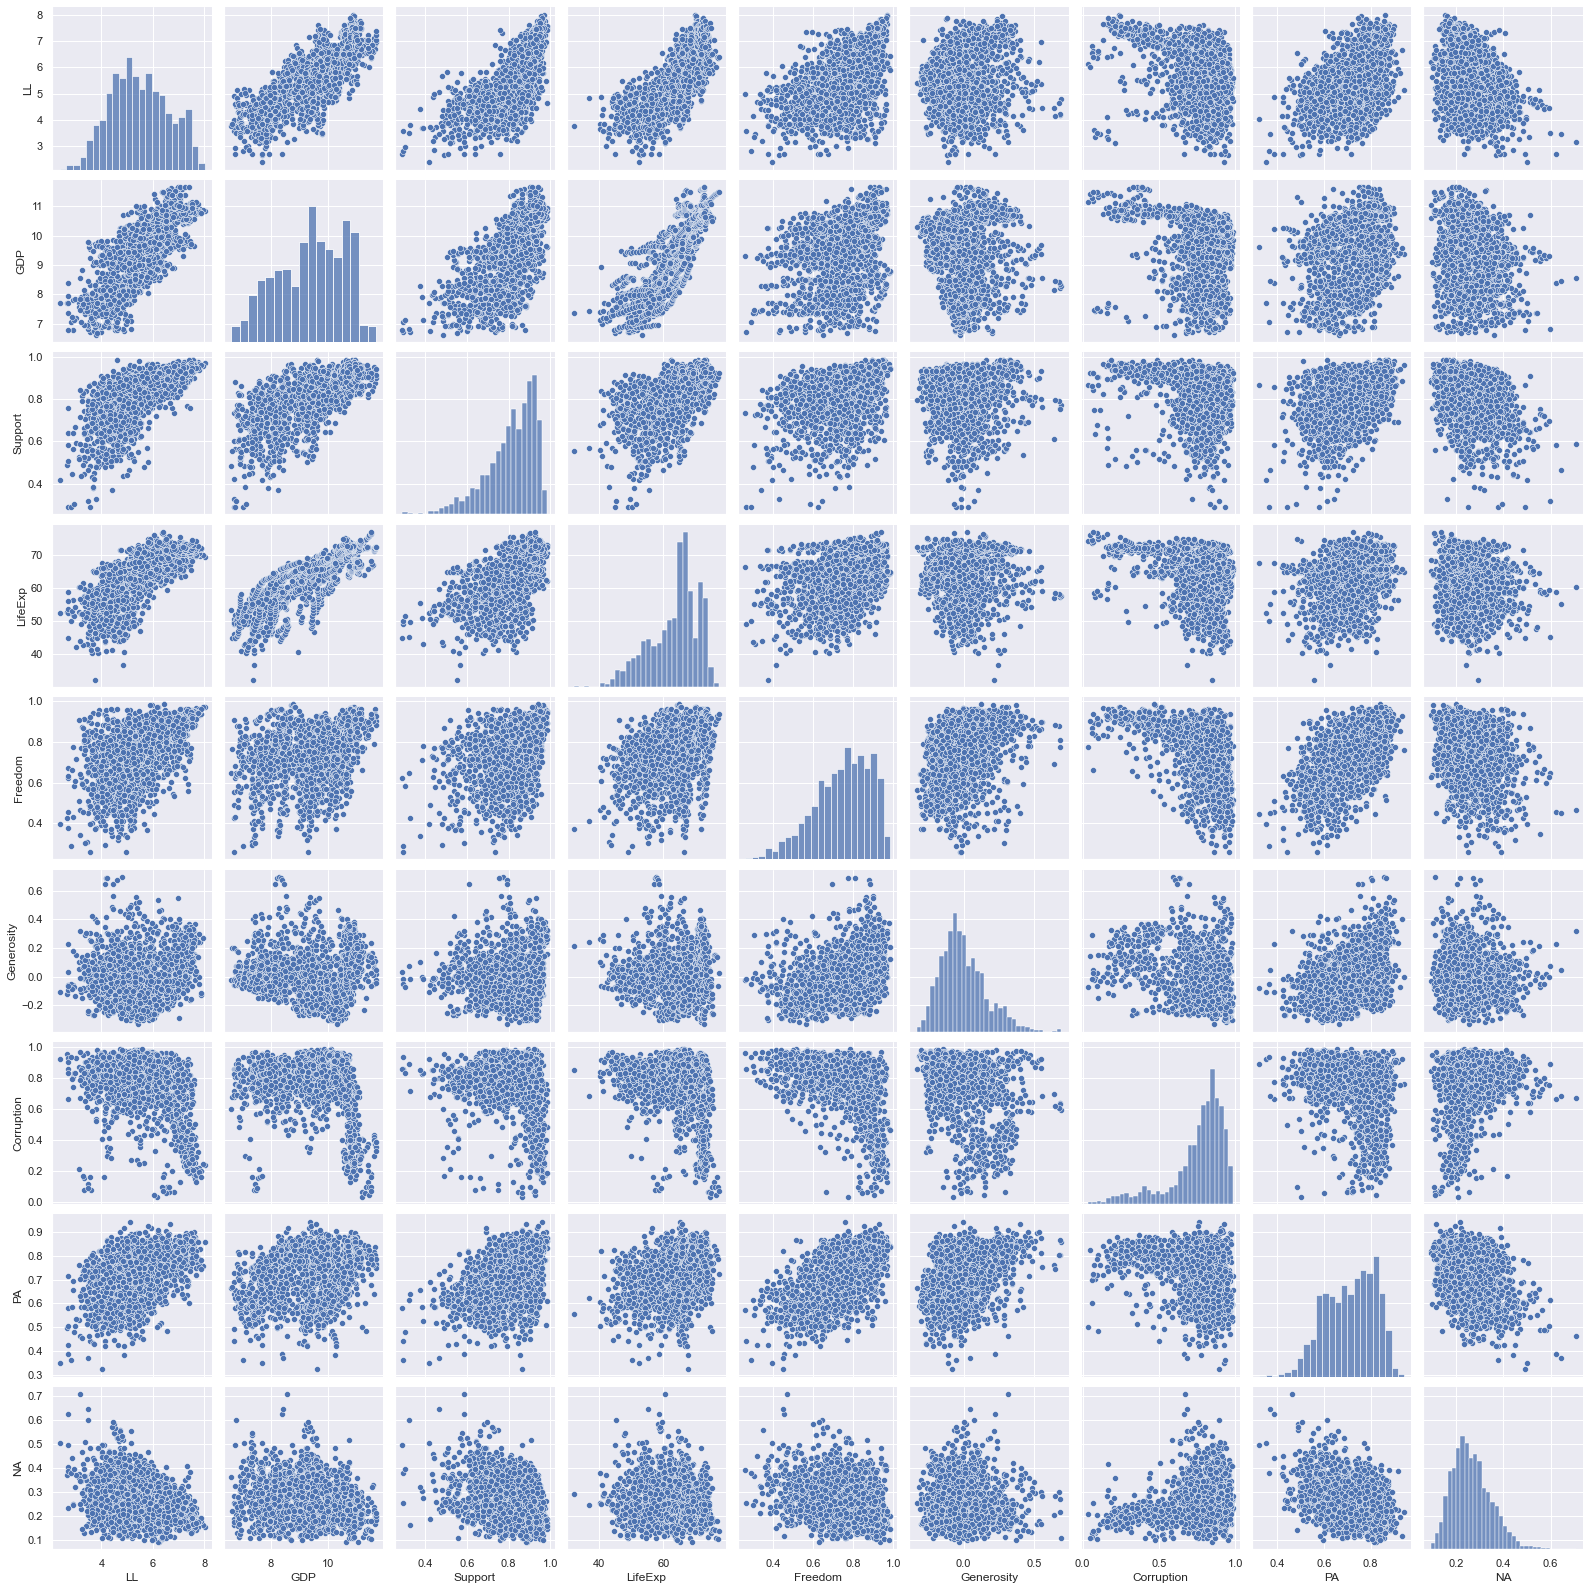

In [4]:
sns.pairplot(NonlyHIR) ##using pairplot for a quick overview of relations between variables for variables
plt.show()

In [5]:
GlobalCorr = NonlyHIR.corr() ## Showing the same thing as above but as a table
GlobalCorr

LL       GDP   Support   LifeExp   Freedom  Generosity  \
LL          1.000000  0.790166  0.709418  0.745818  0.526036    0.190632   
GDP         0.790166  1.000000  0.692602  0.848049  0.367932   -0.000915   
Support     0.709418  0.692602  1.000000  0.612521  0.415257    0.067000   
LifeExp     0.745818  0.848049  0.612521  1.000000  0.393212    0.020737   
Freedom     0.526036  0.367932  0.415257  0.393212  1.000000    0.329300   
Generosity  0.190632 -0.000915  0.067000  0.020737  0.329300    1.000000   
Corruption -0.435708 -0.345511 -0.227986 -0.330751 -0.489591   -0.290706   
PA          0.532943  0.302282  0.439153  0.322786  0.608417    0.358006   
NA         -0.291219 -0.210781 -0.396988 -0.139315 -0.257617   -0.092542   

            Corruption        PA        NA  
LL           -0.435708  0.532943 -0.291219  
GDP          -0.345511  0.302282 -0.210781  
Support      -0.227986  0.439153 -0.396988  
LifeExp      -0.330751  0.322786 -0.139315  
Freedom      -0.489591  0.608417 -0.257617  
Generosity   -0.290706  0.358006 -0.092542  
Corruption    1.000000 -0.298946  0.262958  
PA           -0.298946  1.000000 -0.366321  
NA            0.262958 -0.366321  1.000000

#### Section insight:
##### Highest corelation is between GDP and Life expectancy, not really a surprise there, since higher income generally means more developed countries 

## Excluding non Latin American Countries

In [6]:
LATAM  = ['Argentina','Belize','Bolivia','Brazil','Chile','Colombia','Costa Rica','Dominican Republic','Ecuador','El Salvador','Guatemala','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Uruguay','Venezuela',]
HIRLATAM = HIR[HIR['Country'].isin(LATAM)]
HIRLATAM ##Asigning names with no space to the columns
NonlyHIRLATAM = HIRLATAM.drop(['Country', 'Year'], axis=1) ##Getting rid of non numerical data since I'll be analyzing possible
NonlyHIRLATAM.describe()

LL         GDP     Support     LifeExp     Freedom  Generosity  \
count  261.000000  261.000000  261.000000  261.000000  261.000000  257.000000   
mean     6.098084    9.414969    0.859330   66.344444    0.789946   -0.045405   
std      0.650765    0.487359    0.052618    2.360539    0.088849    0.100786   
min      4.041000    8.398000    0.696000   59.000000    0.458000   -0.226000   
25%      5.701000    9.013000    0.821000   64.860000    0.726000   -0.120000   
50%      6.110000    9.456000    0.872000   66.380000    0.802000   -0.063000   
75%      6.547000    9.826000    0.901000   68.100000    0.863000    0.018000   
max      7.615000   10.356000    0.959000   71.500000    0.942000    0.244000   

       Corruption          PA          NA  
count  261.000000  261.000000  261.000000  
mean     0.782372    0.819854    0.286073  
std      0.084473    0.043609    0.058877  
min      0.471000    0.688000    0.130000  
25%      0.745000    0.793000    0.244000  
50%      0.798000    0.825000    0.285000  
75%      0.841000    0.850000    0.323000  
max      0.931000    0.944000    0.434000

In [7]:
LATAMcorr = NonlyHIRLATAM.corr()
LATAMcorr

LL       GDP   Support   LifeExp   Freedom  Generosity  \
LL          1.000000  0.539173  0.343257  0.416887  0.256050   -0.044341   
GDP         0.539173  1.000000  0.479453  0.643444  0.209973   -0.328249   
Support     0.343257  0.479453  1.000000  0.274961  0.147754   -0.034187   
LifeExp     0.416887  0.643444  0.274961  1.000000  0.249935   -0.170706   
Freedom     0.256050  0.209973  0.147754  0.249935  1.000000   -0.089460   
Generosity -0.044341 -0.328249 -0.034187 -0.170706 -0.089460    1.000000   
Corruption -0.192509 -0.106083 -0.010838 -0.069074 -0.227443    0.038716   
PA          0.392637  0.178984  0.247487  0.300235  0.158067    0.072605   
NA         -0.390545 -0.289995 -0.449889 -0.160358  0.100137   -0.138173   

            Corruption        PA        NA  
LL           -0.192509  0.392637 -0.390545  
GDP          -0.106083  0.178984 -0.289995  
Support      -0.010838  0.247487 -0.449889  
LifeExp      -0.069074  0.300235 -0.160358  
Freedom      -0.227443  0.158067  0.100137  
Generosity    0.038716  0.072605 -0.138173  
Corruption    1.000000  0.045520  0.120306  
PA            0.045520  1.000000 -0.512514  
NA            0.120306 -0.512514  1.000000

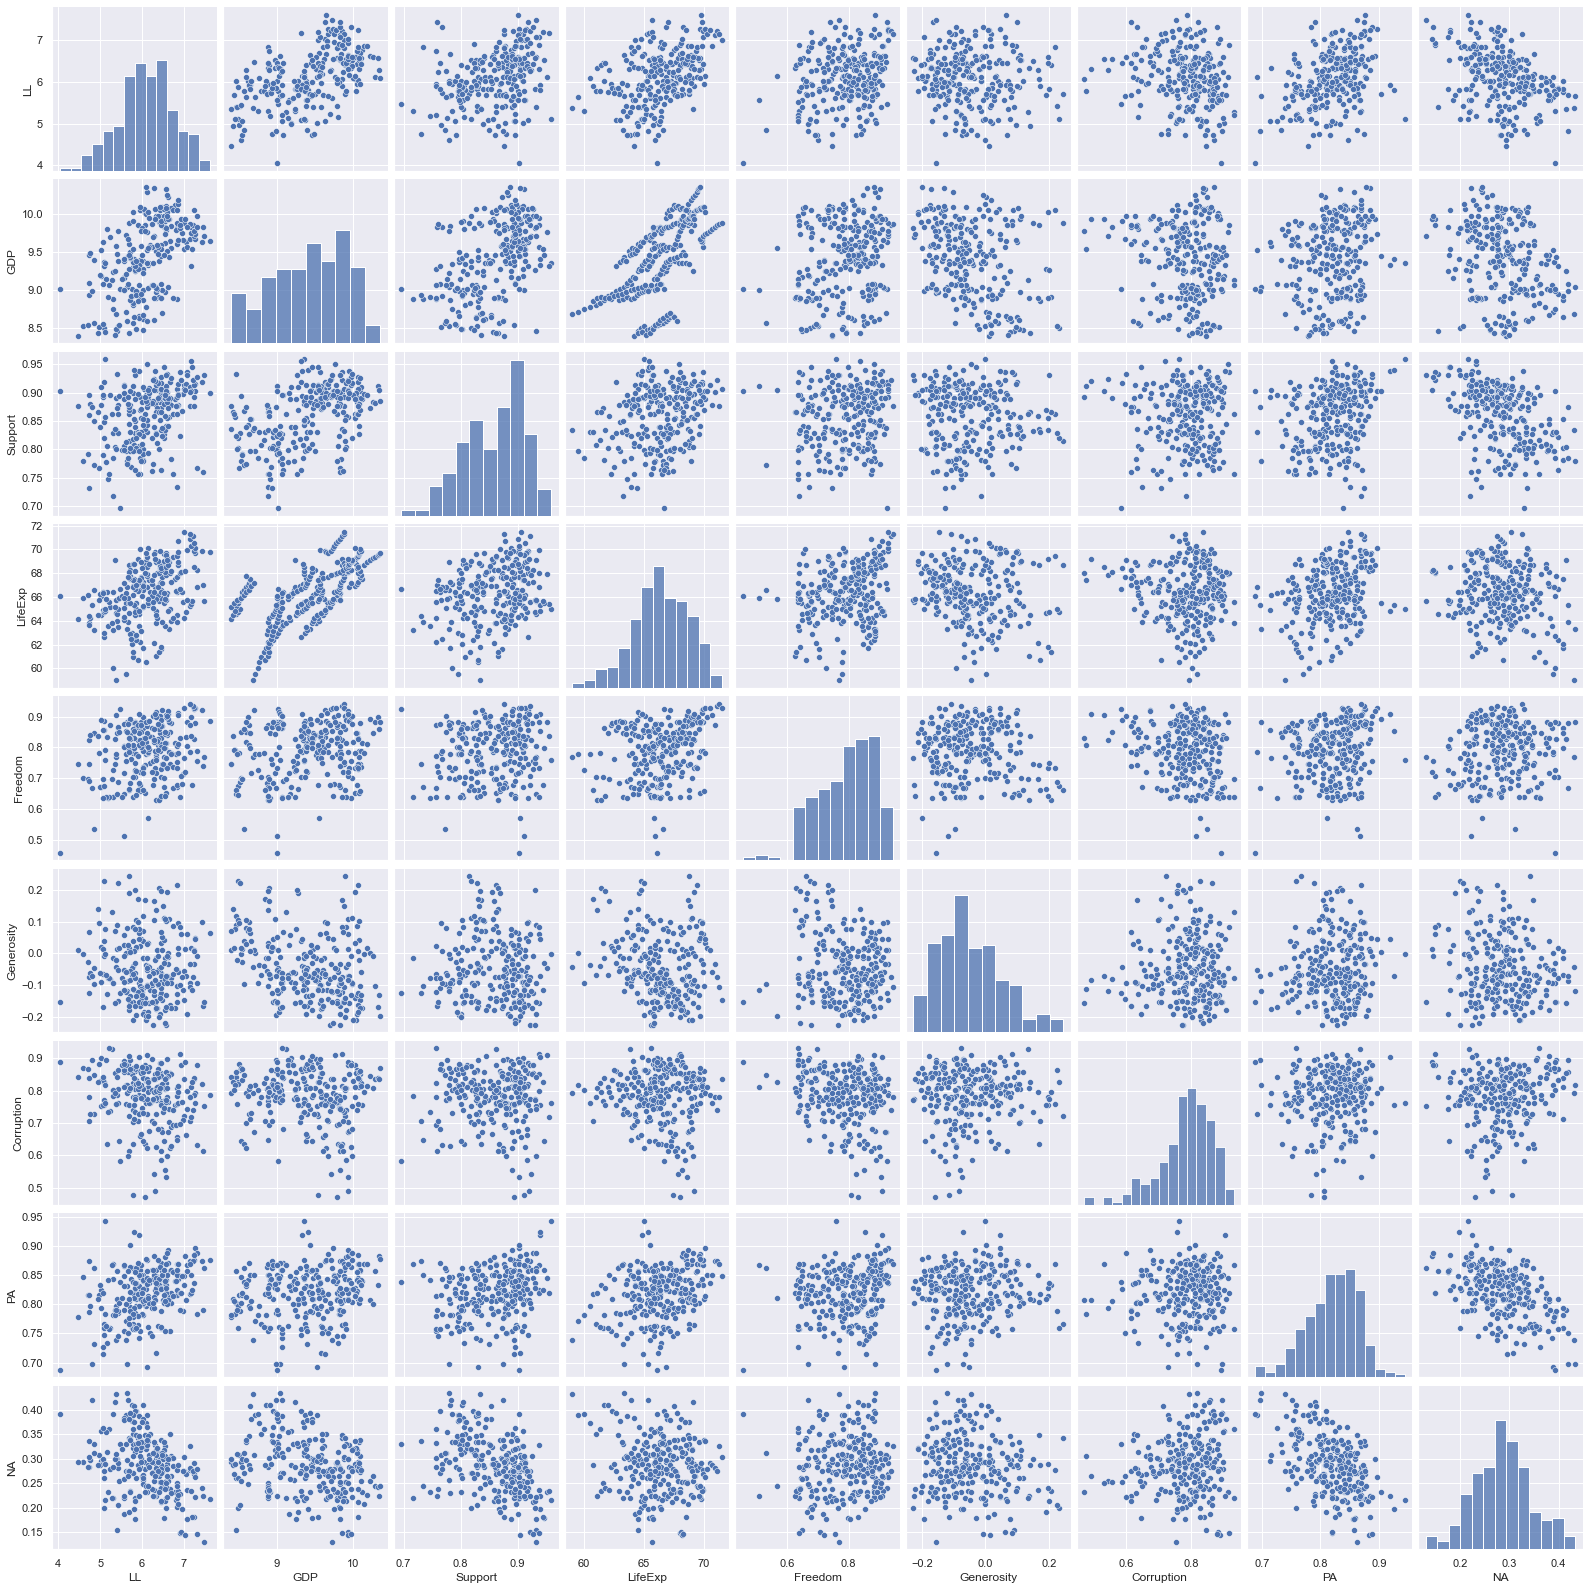

In [8]:
sns.pairplot(NonlyHIRLATAM)
plt.show()

### Comparing Global vs Latin American Corelations to Life Ladder

In [9]:
 LATAMcorr - GlobalCorr


LL       GDP   Support   LifeExp   Freedom  Generosity  \
LL          0.000000 -0.250993 -0.366162 -0.328931 -0.269986   -0.234973   
GDP        -0.250993  0.000000 -0.213149 -0.204605 -0.157959   -0.327334   
Support    -0.366162 -0.213149  0.000000 -0.337560 -0.267503   -0.101187   
LifeExp    -0.328931 -0.204605 -0.337560  0.000000 -0.143277   -0.191443   
Freedom    -0.269986 -0.157959 -0.267503 -0.143277  0.000000   -0.418760   
Generosity -0.234973 -0.327334 -0.101187 -0.191443 -0.418760    0.000000   
Corruption  0.243199  0.239428  0.217148  0.261677  0.262148    0.329422   
PA         -0.140305 -0.123298 -0.191666 -0.022551 -0.450350   -0.285400   
NA         -0.099326 -0.079214 -0.052901 -0.021042  0.357754   -0.045631   

            Corruption        PA        NA  
LL            0.243199 -0.140305 -0.099326  
GDP           0.239428 -0.123298 -0.079214  
Support       0.217148 -0.191666 -0.052901  
LifeExp       0.261677 -0.022551 -0.021042  
Freedom       0.262148 -0.450350  0.357754  
Generosity    0.329422 -0.285400 -0.045631  
Corruption    0.000000  0.344466 -0.142653  
PA            0.344466  0.000000 -0.146194  
NA           -0.142653 -0.146194  0.000000

#### Section insight:
##### Again highest corelation is between GDP and Life expectancy, however, corelation is not as strong as the rest of the world
LATAM data has a higher variation, which makes sense once one understands the geopolitical factors of the region

### Visual Exploration of Latin America Data


#### Getting the AVG LL for each country for all the years of the study

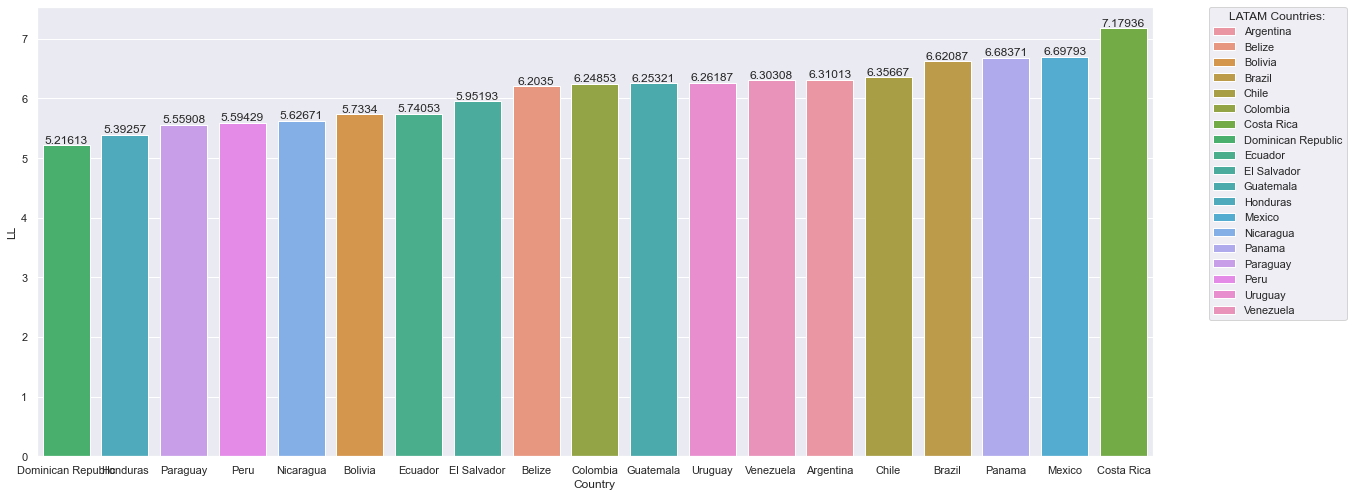

In [10]:
listLATAM = HIRLATAM.groupby('Country')['LL'].mean()
AVGLATAM = pd.DataFrame (listLATAM)##the result of the group by is a list object, here I'm converting it to DF
AVGLATAM.reset_index(inplace=True)
orderLATAM=AVGLATAM.sort_values('LL').Country ##I'm defining a custom order to implement on the bar plot, in this case based on LL
ax = sns.barplot(y=AVGLATAM['LL'], x=AVGLATAM['Country'],hue=AVGLATAM['Country'],dodge=False,order =orderLATAM)
for i in ax.containers: ##This adds the values to each label
    ax.bar_label(i,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title = 'LATAM Countries:')
plt.show()


#### Score changes through the years 

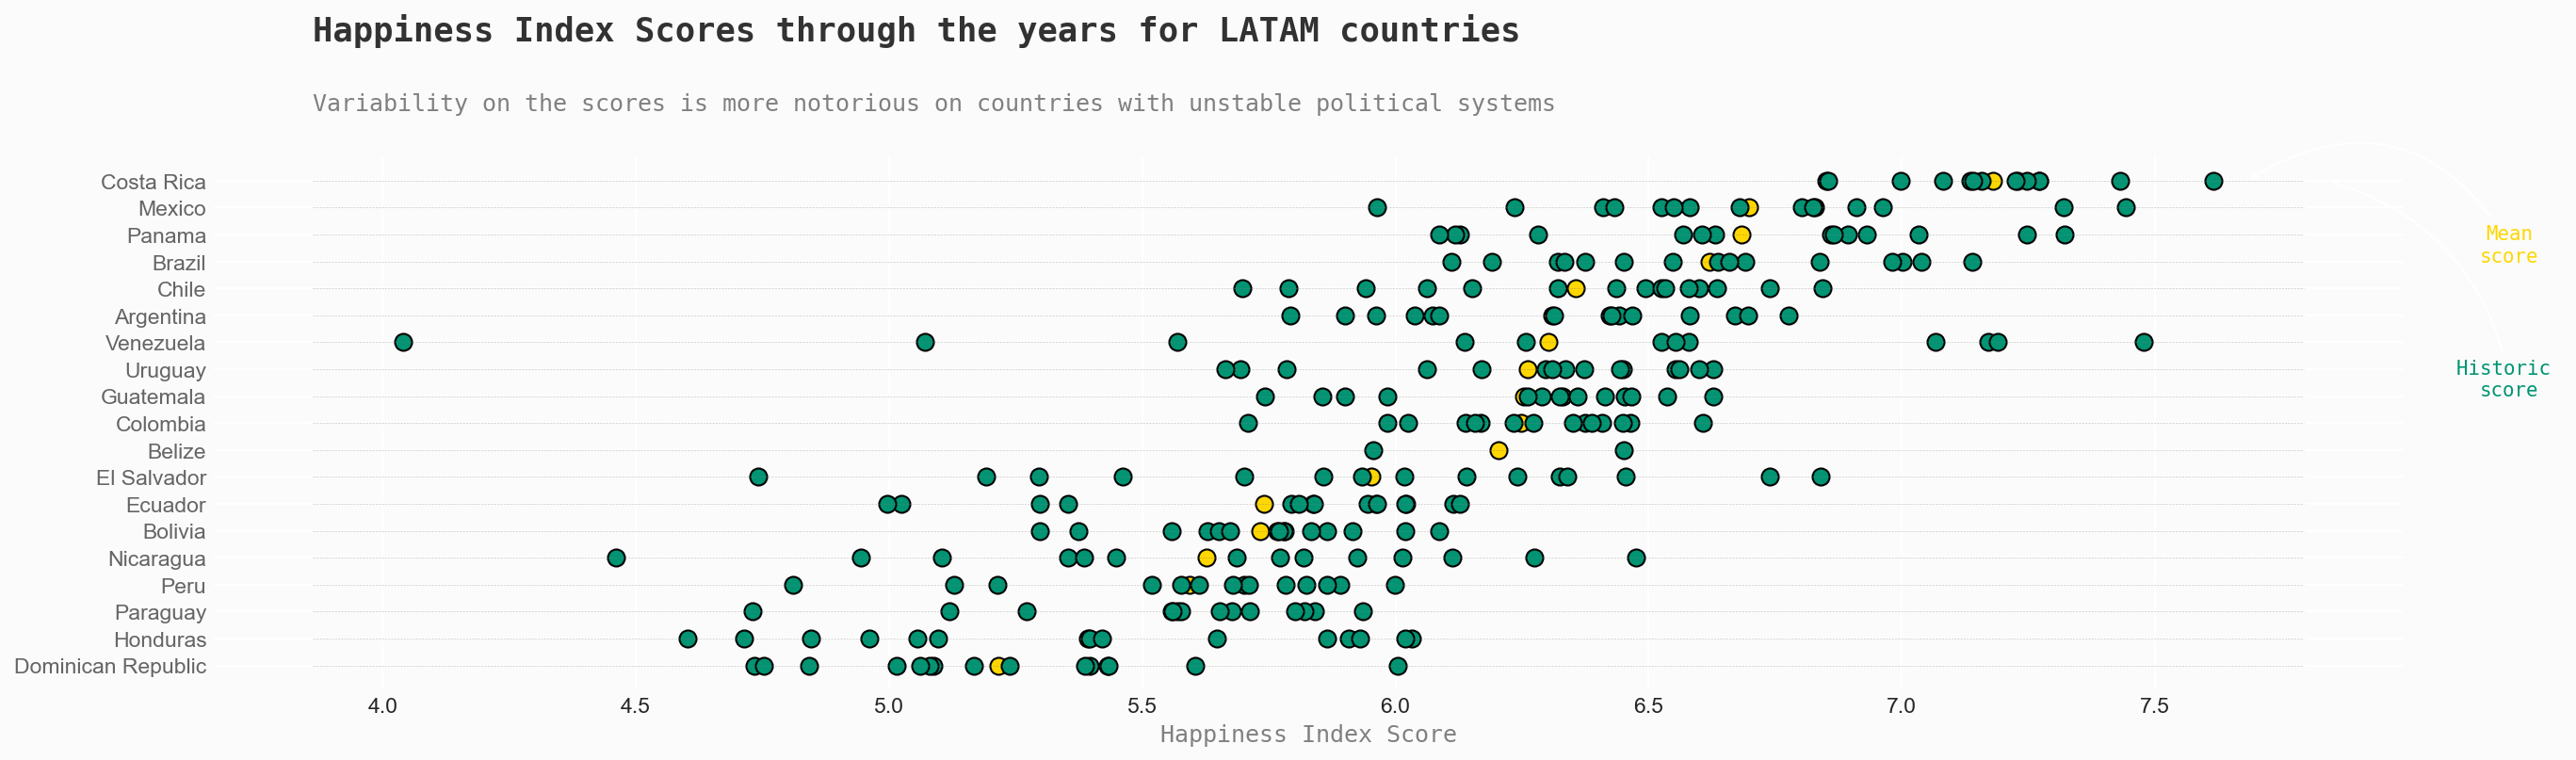

In [11]:
## This is a piece of code I got from someone elses notebook and I implemented it because I was very curious on how it works a
background = "#fbfbfb" #White
fig, ax = plt.subplots(1,1, figsize=(20, 5),dpi=150) ## Creates 2 twin subplots
fig.patch.set_facecolor(background) # figure background color
ax.set_facecolor(background) #sets background color

# If needed this code reduces the list to the first 20, in this case is not needed
top_list_ = HIRLATAM.groupby('Country')['LL'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='LL',ascending=True)
plot = 1 #initializes the first plot object

##Drawing the first series of scatter plots

for country in top_list_['Country']: #We will go trough the entire list 
    mean = HIRLATAM[HIRLATAM['Country'] == country].groupby('Country')['LL'].mean() ## Getting the mean by country
    # mean score
    sns.scatterplot(data=HIRLATAM[HIRLATAM['Country'] == country], y=plot, x=mean,color='gold',ec='black',linewidth=1,s=75,ax=ax)
    #Scores from other years 
    sns.scatterplot(data=HIRLATAM[HIRLATAM['Country'] == country], y=plot, x='LL',color=high_c,ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1
################################################
## Title and Styling
ax.set_yticks(top_list_.index+1) #Distance between elements of Y
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7) #Filling Y with elements
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Happiness Index Score",fontfamily='monospace',loc='center',color='gray') #Title of X axis


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    
Xstart, Xend = ax.get_xlim() #Get the limits of the X axis on the view
Ystart, Yend = ax.get_ylim()#Get the limits of the Y axis on the view
#Defines the horizontal lines
ax.hlines(y=top_list_.index+1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
##Writes a text to the plot, and position it using the end values of Y and X 
ax.text(Xstart, Yend+4.3, 'Happiness Index Scores through the years for LATAM countries', fontsize=17, fontweight='bold', fontfamily='monospace',color='#323232')
ax.text(Xstart, Yend+0.75,
'''
Variability on the scores is more notorious on countries with unstable political systems
''', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')
#This is supposed to create 2 arrows but it's not working for unknow reasons 
plt.annotate('Historic \nscore', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(facecolor='red',arrowstyle="->",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color=high_c)

plt.annotate('Mean\nscore', xy=(7.6804, 19), xytext=(8.2, 16),
             arrowprops=dict(facecolor='gold',arrowstyle="->",connectionstyle="arc3,rad=.5"), fontsize=10,fontfamily='monospace',ha='center', color='gold')


plt.show()

#### Section insight:
##### Again highest corelation is between GDP and Life expectancy, however, corelation is not as strong as the rest of the world
LATAM data has a high variation, which makes sense once one understands the geopolitical factors of the region

## Understanding changes over time

<AxesSubplot:xlabel='Year', ylabel='LL'>

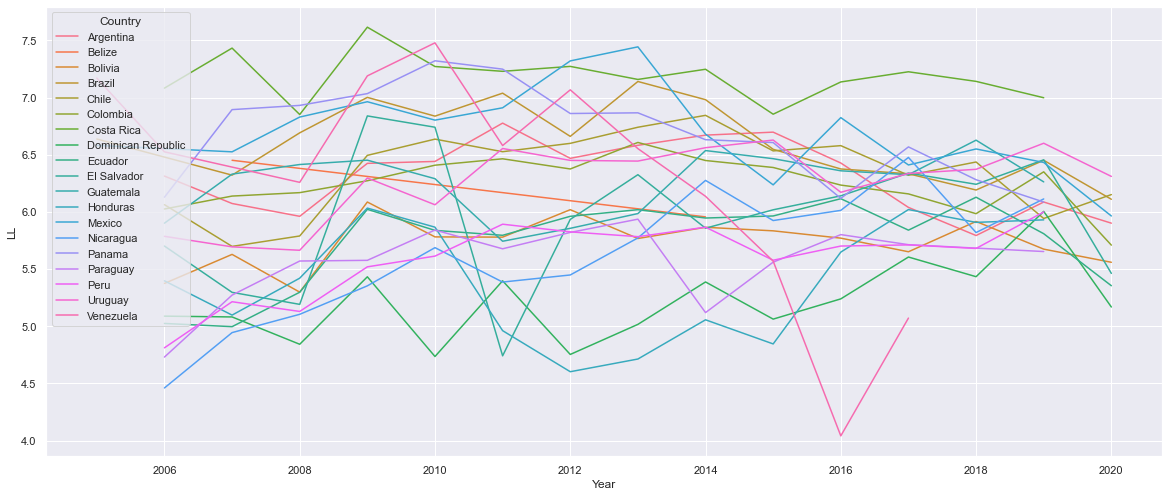

In [12]:

sns.lineplot(data=HIRLATAM, x=HIRLATAM['Year'], y=HIRLATAM['LL'],err_style=None,hue=HIRLATAM['Country'])


### Due to the number of countries this graphis is really hard to read, luckily I found another option

In [19]:
piv = pd.pivot_table(HIRLATAM, values="LL",index=["Country"], columns=["Year"], fill_value=0)

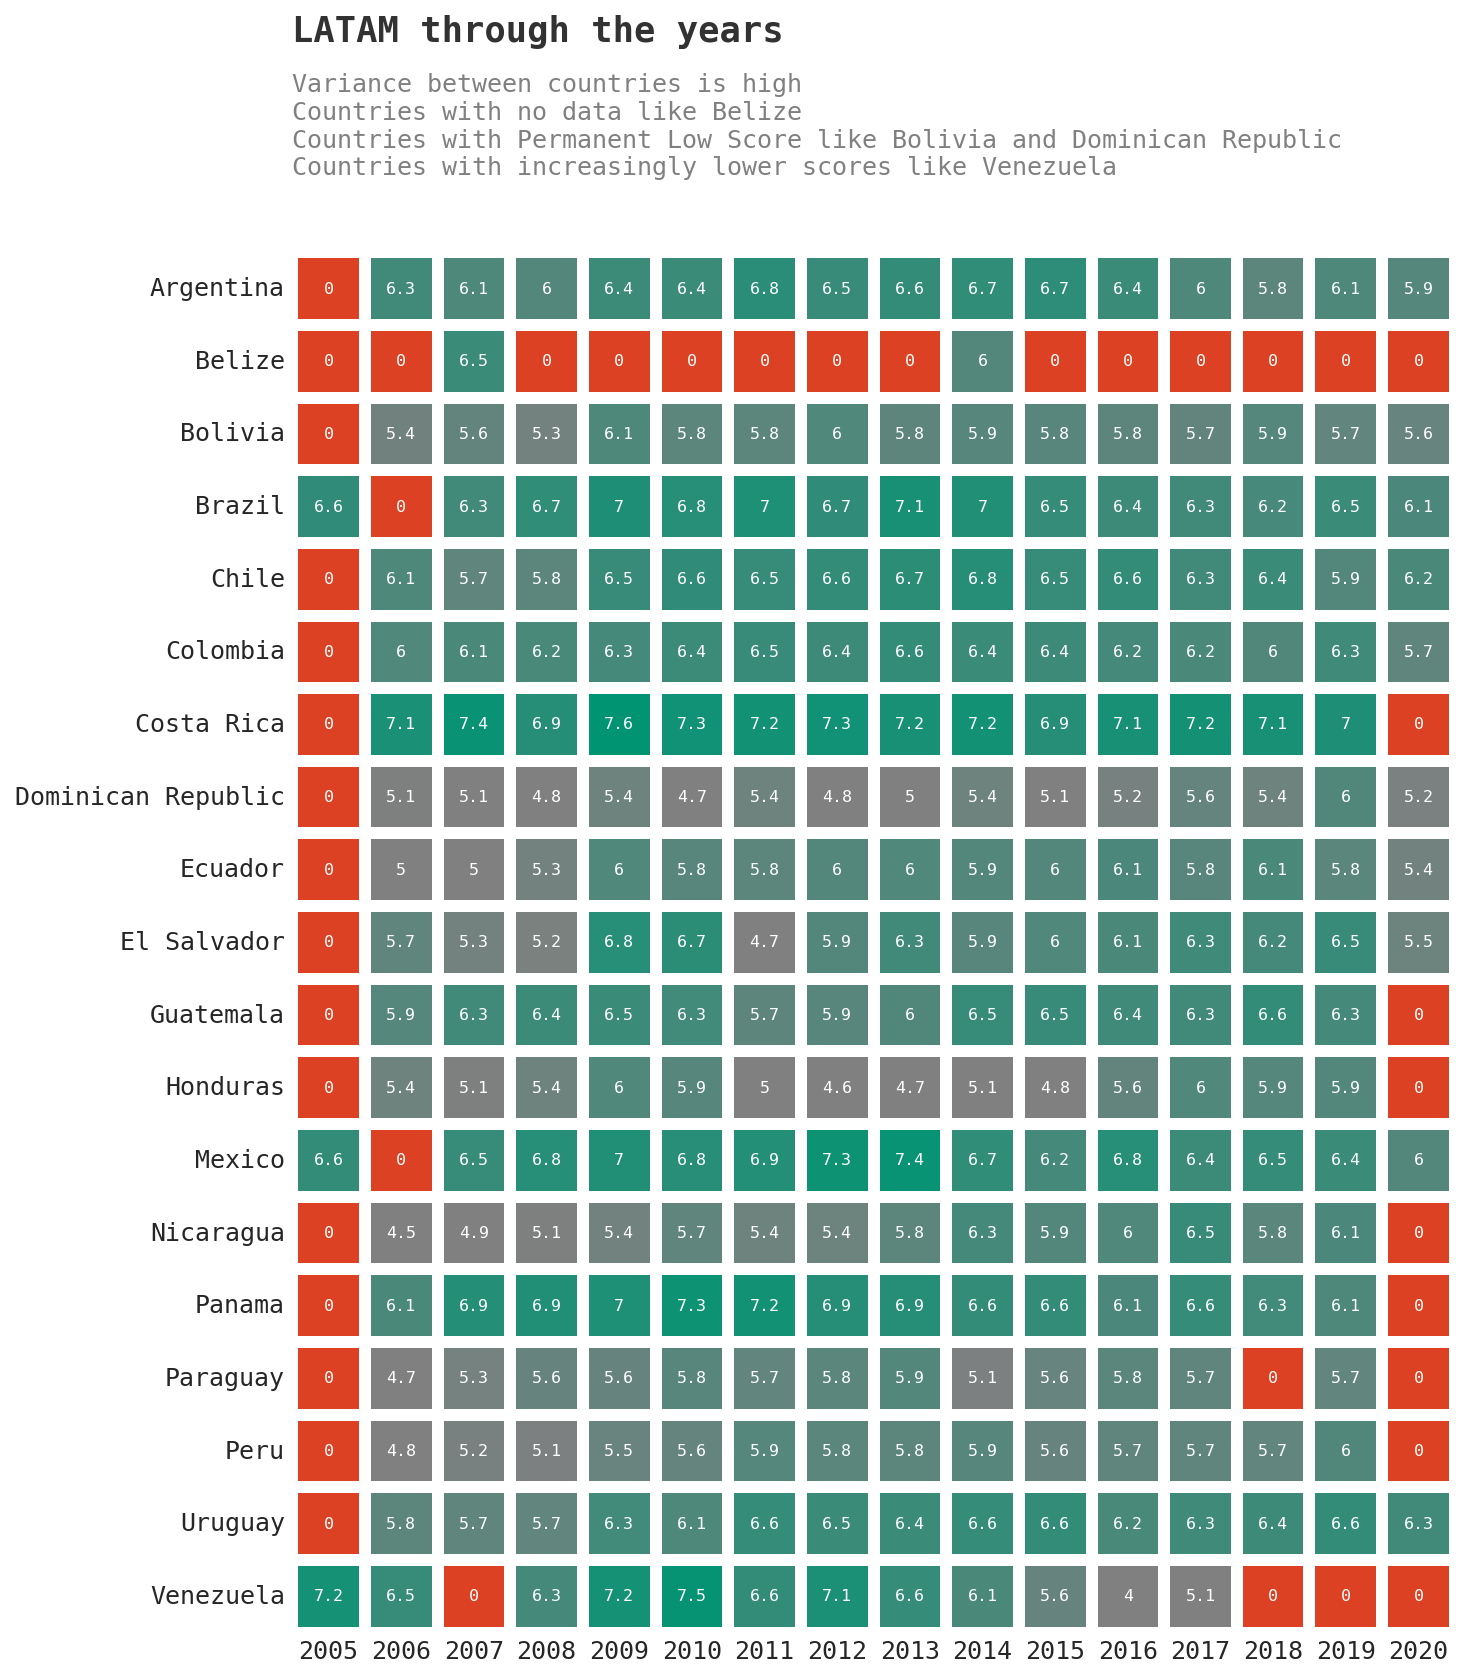

In [14]:
##########Graphic seetings##############
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor='white')
ax.set_facecolor('white') 
plt.rcParams["font.family"] = "monospace"
colors = [low_c,'gray','gray',high_c]
cmap = mplt.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(piv, ##This is the pivot Table I created for LL and Country 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)
########################

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,-2.9,'LATAM through the years',fontfamily='monospace',fontweight='normal',fontsize=17,weight='bold',color='#323232')
ax.text(0,-0.3,
'''
Variance between countries is high
Countries with no data like Belize
Countries with Permanent Low Score like Bolivia and Dominican Republic
Countries with increasingly lower scores like Venezuela

''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

plt.show()


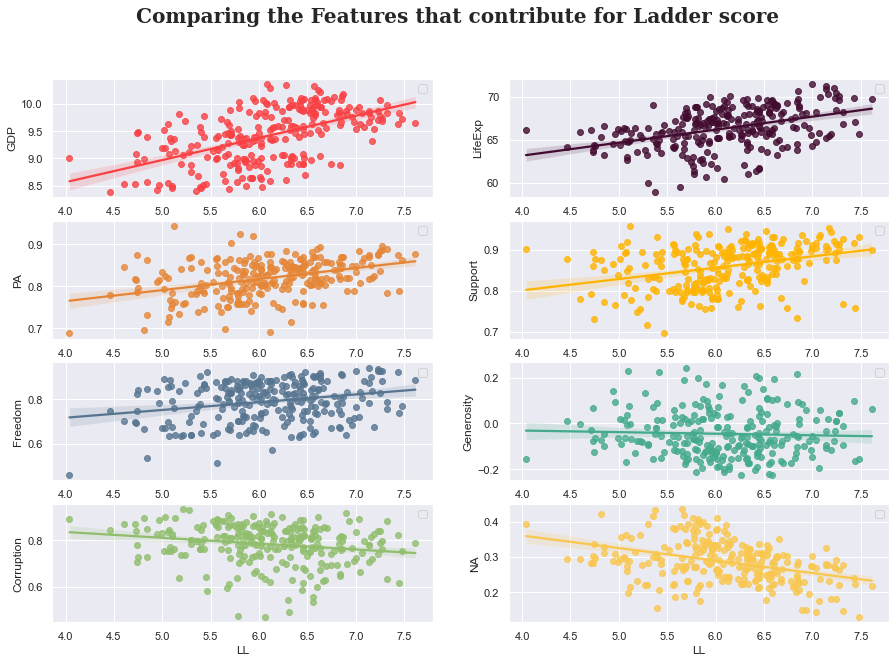

In [24]:
cols=NonlyHIRLATAM.corr()['LL'].sort_values(ascending=False)
fig=plt.figure(figsize=(15,10))
plt.suptitle("Comparing the Features that contribute for Ladder score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]: 
    ax=plt.subplot(4,2,1+j) ## on AX I'll create 4 rows of subplots divided in 2 columns
    ax=sns.regplot(data=HIRLATAM, x='LL',y=i, color=colors[-j]) ## regplot: Plot data and a linear regression model fit.
    ##For data we use the DF, X is LL, the dependant variable of the DataSet, Y is the data of each column and...
    ##Color is a list of colors defined on the beginning of the document
    ax.legend('')
    j=j+1
    
plt.legend('')

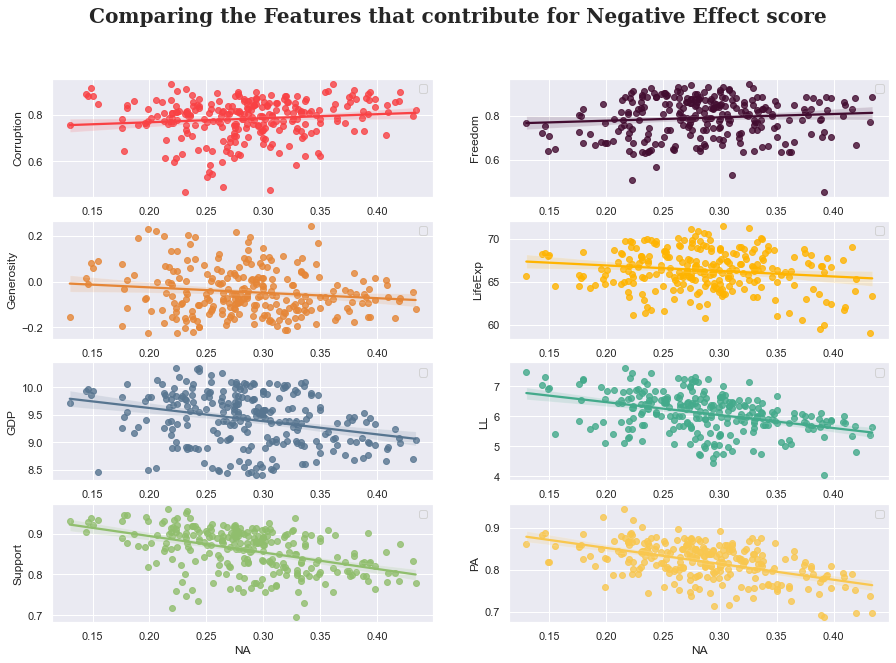

In [45]:
cols=NonlyHIRLATAM.corr()['NA'].sort_values(ascending=False)
fig=plt.figure(figsize=(15,10))
plt.suptitle("Comparing the Features that contribute for Negative Effect score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]: 
    ax=plt.subplot(4,2,1+j) ## on AX I'll create 4 rows of subplots divided in 2 columns
    ax=sns.regplot(data=HIRLATAM, x='NA',y=i, color=colors[-j]) ## regplot: Plot data and a linear regression model fit.
    ##For data we use the DF, X is LL, the dependant variable of the DataSet, Y is the data of each column and...
    ##Color is a list of colors defined on the beginning of the document
    ax.legend('')
    j=j+1
    
plt.legend('')

### Conclusion of this segment: 
#### Was my hipothesis correct? 
*Social support and Freedom to make life choices are the most important factors to reduce negative affect in Latin American Countries.*

Looking at the corelation between variables Support is positive corelated to Negative Affect and Freedom doesn't seem to have much weight on Negative Affect.

####  So my hipothesis was incorrect, because it included both Freedom and Social support, but it seems like Freedom is not one of the most important factors

   ## Numerical Model
   ### First Linea Regression with all possible variables LATAM only

In [27]:
model = smf.ols(data=NonlyHIRLATAM, formula="LL ~ GDP +PA + Support + LifeExp + Freedom + Generosity + Corruption + NA")
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LL   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     23.99
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.85e-27
Time:                        14:05:05   Log-Likelihood:                -179.71
No. Observations:                 257   AIC:                             377.4
Df Residuals:                     248   BIC:                             409.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1707      1.211     -1.793      0.074      -4.555       0.214
GDP            0.5819      0.099      5.885      0.000       0.387       0.777
PA             3.3269      0.901      3.691      0.000       1.551       5.102
Support       -0.3124      0.738     -0.423      0.673      -1.767       1.142
LifeExp        0.0114      0.018      0.628      0.531      -0.024       0.047
Freedom        0.8208      0.393      2.090      0.038       0.047       1.594
Generosity     0.5439      0.339      1.606      0.109      -0.123       1.211
Corruption    -0.7861      0.392     -2.005      0.046      -1.558      -0.014
NA            -1.5512      0.739     -2.098      0.037      -3.008      -0.095
==============================================================================
Omnibus:                        4.575   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.666
Skew:                          -0.311   Prob(JB):                       0.0970
Kurtosis:                       2.779   Cond. No.                     3.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation 
The goodness of fit is pretty low (0.436), as expected since we are using all the possible independent variables and the data is way too disperse

Also we are being told there is possible multicollinearity, which makes sense if one looks at the corelations tables.

#### Based on the corelation graphs, we could discard corruption, Negative effect, and Life exp (impact on LL not as clear as the other ) and Life Expectancy (Highly corelated to GDP)  from the model and see if that could have a positive effect on R2

In [29]:
model = smf.ols(data=NonlyHIRLATAM, formula="LL ~ GDP +PA + Support + Freedom + Generosity")
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LL   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     34.94
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           4.61e-27
Time:                        14:05:21   Log-Likelihood:                -185.49
No. Observations:                 257   AIC:                             383.0
Df Residuals:                     251   BIC:                             404.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2766      0.807     -5.298      0.000      -5.866      -2.687
GDP            0.6635      0.080      8.337      0.000       0.507       0.820
PA             4.2289      0.757      5.583      0.000       2.737       5.721
Support        0.0788      0.703      0.112      0.911      -1.306       1.463
Freedom        0.7788      0.365      2.136      0.034       0.061       1.497
Generosity     0.7035      0.337      2.086      0.038       0.039       1.368
==============================================================================
Omnibus:                        1.206   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.084
Skew:                          -0.159   Prob(JB):                        0.582
Kurtosis:                       3.020   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Reducing the number of variables is actually worsening the R2
### By removing Life Expectancy we got rid of the multicollinearity warning 
#### The smallest possible linear regression has the worst R2 so far, caused by and visible on the data points being so scattered

<AxesSubplot:xlabel='LL', ylabel='GDP'>

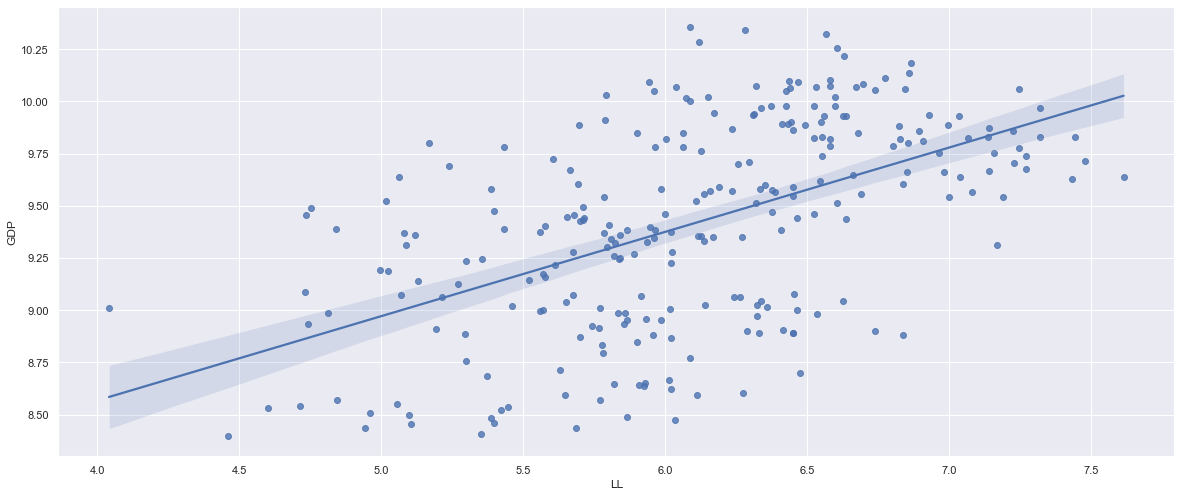

In [30]:
model = smf.ols(data=NonlyHIRLATAM, formula="LL ~ GDP") ##using GDP because it's the one with the highest corelation
result = model.fit()
sns.regplot(x='LL', y='GDP', data=NonlyHIRLATAM)


In [31]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LL   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           4.38e-21
Time:                        14:05:45   Log-Likelihood:                -212.89
No. Observations:                 261   AIC:                             429.8
Df Residuals:                     259   BIC:                             436.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6802      0.659     -1.033      0.303      -1.977       0.617
GDP            0.7200      0.070     10.303      0.000       0.582       0.858
==============================================================================
Omnibus:                        1.786   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.710
Skew:                          -0.198   Prob(JB):                        0.425
Kurtosis:                       2.978   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   ## Using LOG Model

In [32]:
logmodel = smf.ols("np.log(LL) ~ np.log(GDP)", NonlyHIRLATAM).fit()
logmodel.summary()
##I understand this data is linear, scattered, but linear, I wanted to try this regardless.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(LL)   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           7.50e-21
Time:                        14:05:56   Log-Likelihood:                 251.83
No. Observations:                 261   AIC:                            -499.7
Df Residuals:                     259   BIC:                            -492.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.7155      0.246     -2.907      0.004      -1.200      -0.231
np.log(GDP)     1.1235      0.110     10.230      0.000       0.907       1.340
==============================================================================
Omnibus:                       13.127   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.728
Skew:                          -0.513   Prob(JB):                      0.00104
Kurtosis:                       3.460   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After seeing LOG not helping, I'm starting to think having countries with such a difference in political and social situations is definetly a negative factor when trying to create a linear regression, because of it, I'll try use only the 5 top  based on LL

In [33]:


LATAMtop5  = AVGLATAM.nlargest(5, 'LL')['Country']
HIRLATAMTOP5 = HIRLATAM[HIRLATAM['Country'].isin(LATAMtop5)]
HIRLATAMTOP5.reset_index(inplace=True)
HIRLATAMTOP5

index Country  Year     LL     GDP  Support  LifeExp  Freedom  Generosity  \
0     218  Brazil  2005  6.637   9.438    0.883    63.30    0.882         NaN   
1     219  Brazil  2007  6.321   9.515    0.886    63.78    0.777      -0.016   
2     220  Brazil  2008  6.691   9.555    0.878    64.02    0.782      -0.078   
3     221  Brazil  2009  7.001   9.544    0.913    64.26    0.767      -0.055   
4     222  Brazil  2010  6.837   9.607    0.906    64.50    0.806      -0.054   
..    ...     ...   ...    ...     ...      ...      ...      ...         ...   
68   1348  Panama  2015  6.606  10.255    0.883    69.30    0.847      -0.007   
69   1349  Panama  2016  6.118  10.287    0.882    69.40    0.884      -0.102   
70   1350  Panama  2017  6.568  10.324    0.912    69.50    0.900      -0.170   
71   1351  Panama  2018  6.281  10.343    0.904    69.60    0.861      -0.131   
72   1352  Panama  2019  6.086  10.356    0.886    69.70    0.883      -0.199   

    Corruption     PA     NA  
0        0.745  0.818  0.302  
1        0.728  0.859  0.299  
2        0.688  0.820  0.265  
3        0.723  0.833  0.274  
4        0.656  0.817  0.250  
..         ...    ...    ...  
68       0.810  0.801  0.264  
69       0.837  0.858  0.244  
70       0.841  0.833  0.242  
71       0.837  0.884  0.223  
72       0.869  0.878  0.244  

[73 rows x 12 columns]

In [34]:
model = smf.ols(data=HIRLATAMTOP5, formula="LL ~ GDP +PA + Support + Freedom + Generosity")
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LL   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     8.263
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           4.55e-06
Time:                        14:06:23   Log-Likelihood:                -23.128
No. Observations:                  70   AIC:                             58.26
Df Residuals:                      64   BIC:                             71.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8639      2.299      4.291      0.000       5.271      14.456
GDP           -0.8217      0.220     -3.743      0.000      -1.260      -0.383
PA             5.4096      1.221      4.432      0.000       2.971       7.848
Support        0.0990      1.113      0.089      0.929      -2.125       2.323
Freedom        0.4733      0.599      0.790      0.432      -0.724       1.670
Generosity     0.1144      0.432      0.265      0.792      -0.748       0.977
==============================================================================
Omnibus:                        2.037   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.388
Skew:                          -0.122   Prob(JB):                        0.500
Kurtosis:                       3.645   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='LL', ylabel='GDP'>

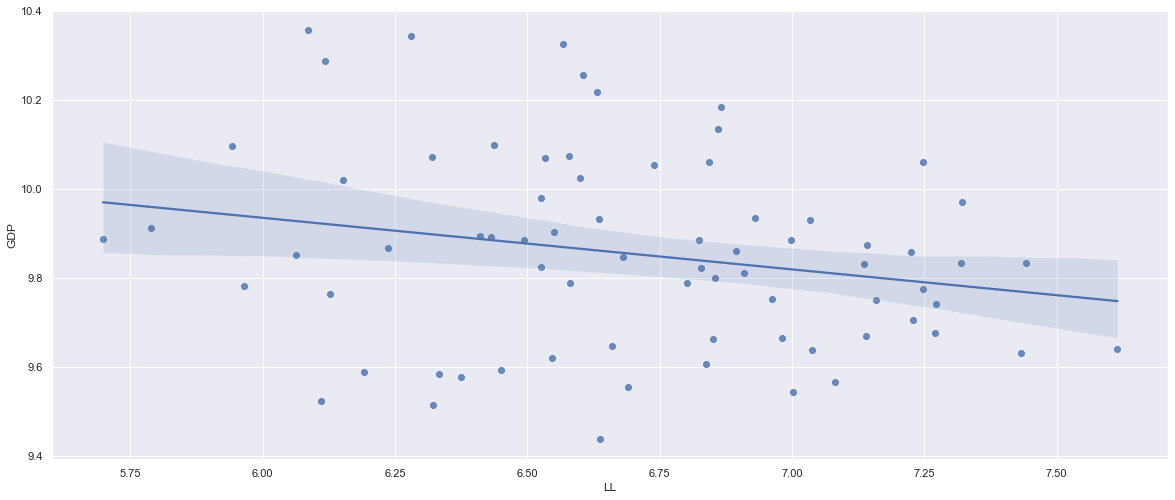

In [35]:
model = smf.ols(data=HIRLATAMTOP5, formula="LL ~ GDP +PA + Support + Freedom + Generosity")
result = model.fit()
sns.regplot(x='LL', y='GDP', data=HIRLATAMTOP5)

### R2 is actually worse for the top 5 countries by AVG LL, LATAM current Dataset is not ideal to create a linear regression

## What if we use the entire Data Set instead of only LATAM? 

In [46]:

HIR.columns = ['Country','Year','LL', 'GDP', 'Support', 'LifeExp','Freedom','Generosity','Corruption','PA','NA'] 
HIR
model = smf.ols(data=HIR, formula="LL ~ GDP +PA + Support + LifeExp + Freedom + Generosity + Corruption + NA")
result = model.fit()
result.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LL   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     715.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:23   Log-Likelihood:                -1382.8
No. Observations:                1708   AIC:                             2784.
Df Residuals:                    1699   BIC:                             2833.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5268      0.186    -13.563      0.000      -2.892      -2.161
GDP            0.3824      0.025     15.004      0.000       0.332       0.432
PA             1.9873      0.170     11.685      0.000       1.654       2.321
Support        1.8450      0.175     10.530      0.000       1.501       2.189
LifeExp        0.0267      0.003      7.710      0.000       0.020       0.034
Freedom        0.3906      0.131      2.987      0.003       0.134       0.647
Generosity     0.4202      0.092      4.550      0.000       0.239       0.601
Corruption    -0.6993      0.088     -7.947      0.000      -0.872      -0.527
NA             0.1862      0.187      0.998      0.319      -0.180       0.552
==============================================================================
Omnibus:                       56.791   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.363
Skew:                          -0.363   Prob(JB):                     1.17e-16
Kurtosis:                       3.710   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='LL', ylabel='GDP'>

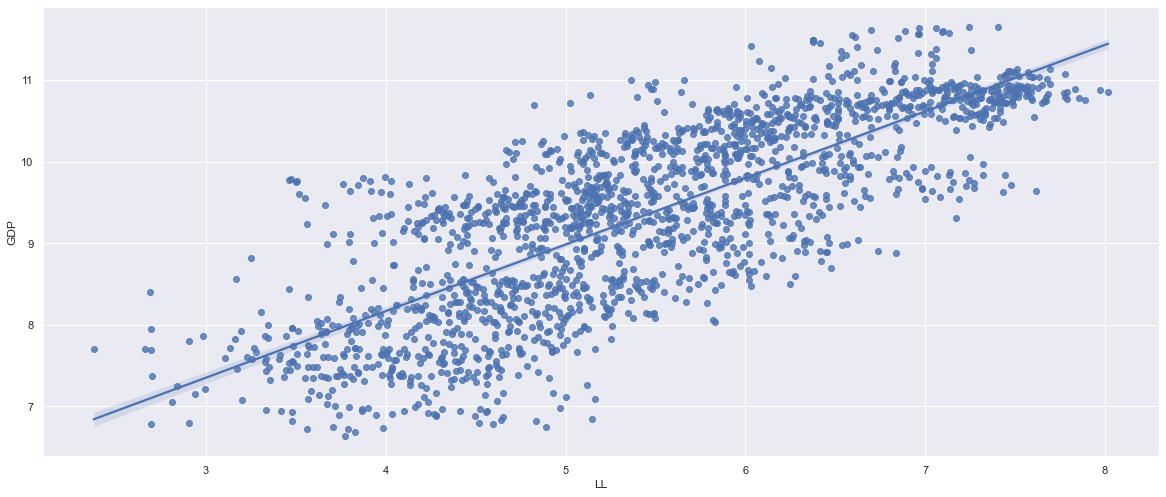

In [37]:
sns.regplot(x='LL', y='GDP', data=HIR)

### Goodness of fit is much better, with 0.77 vs LATAM only 0.46

## Regression Model Evaluation

Since LATAM data was too disperse to get a good R2, I'll use global data for model evaluation 

1. **Root mean-squared error** measures the square root of the average squared-distance between the observations and the model predictions. This is equivalent to the standard deviation of the residuals. (This measure is in the same units as the data.)
$$  \text{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-y_i)^2} $$

2. **Mean absolute error** measures the average distance between the observations and the model predictions. (This measure is in the same units as the data.) 
$$ \text{MAE} = \frac{1}{n}\sum_{i=1}^n \big|z_i-y_i \big| $$

3. **Coefficient of determination**, often denoted $R^2$. (This measure is _not_ in the same units as the data.)
$$ R^2 = 1 - \frac{\sum_{i=1}^n(z_i-y_i)^2}{\sum_{i=1}^n(y_i-\mu_Y)^2}  = 1-\frac{\text{MSE}}{n\cdot{\sigma_y}^2}$$

### Training/Test Sets

The dataset has 12 years worth of data, to create a training and test datasets I'm going to split by years, Training DS will have 9 years and testing will have 3

In [39]:
HIR['Year']
TrainingYears = [2008,2009,2011,2012,2013,2014,2015,2016,2018,2019] ## For LATAM I excluded 2008 but Globally there is not need
TestingYears = [2010,2017,2020]
HIRTrainingYears = HIR[HIR['Year'].isin(TrainingYears)]
HIRTestingYears = HIR[HIR['Year'].isin(TestingYears)]
HIRTrainingYears.reset_index(drop=True)

Country  Year     LL    GDP  Support  LifeExp  Freedom  Generosity  \
0     Afghanistan  2008  3.724  7.370    0.451    50.80    0.718       0.168   
1     Afghanistan  2009  4.402  7.540    0.552    51.20    0.679       0.190   
2     Afghanistan  2011  3.832  7.620    0.521    51.92    0.496       0.162   
3     Afghanistan  2012  3.783  7.705    0.521    52.24    0.531       0.236   
4     Afghanistan  2013  3.572  7.725    0.484    52.56    0.578       0.061   
...           ...   ...    ...    ...      ...      ...      ...         ...   
1334     Zimbabwe  2014  4.184  7.991    0.766    52.38    0.642      -0.074   
1335     Zimbabwe  2015  3.703  7.992    0.736    53.80    0.667      -0.123   
1336     Zimbabwe  2016  3.735  7.984    0.768    54.40    0.733      -0.095   
1337     Zimbabwe  2018  3.616  8.049    0.775    55.60    0.763      -0.068   
1338     Zimbabwe  2019  2.694  7.950    0.759    56.20    0.632      -0.064   

      Corruption     PA     NA  
0          0.882  0.518  0.258  
1          0.850  0.584  0.237  
2          0.731  0.611  0.267  
3          0.776  0.710  0.268  
4          0.823  0.621  0.273  
...          ...    ...    ...  
1334       0.820  0.725  0.239  
1335       0.810  0.715  0.179  
1336       0.724  0.738  0.209  
1337       0.844  0.710  0.212  
1338       0.831  0.716  0.235  

[1339 rows x 11 columns]

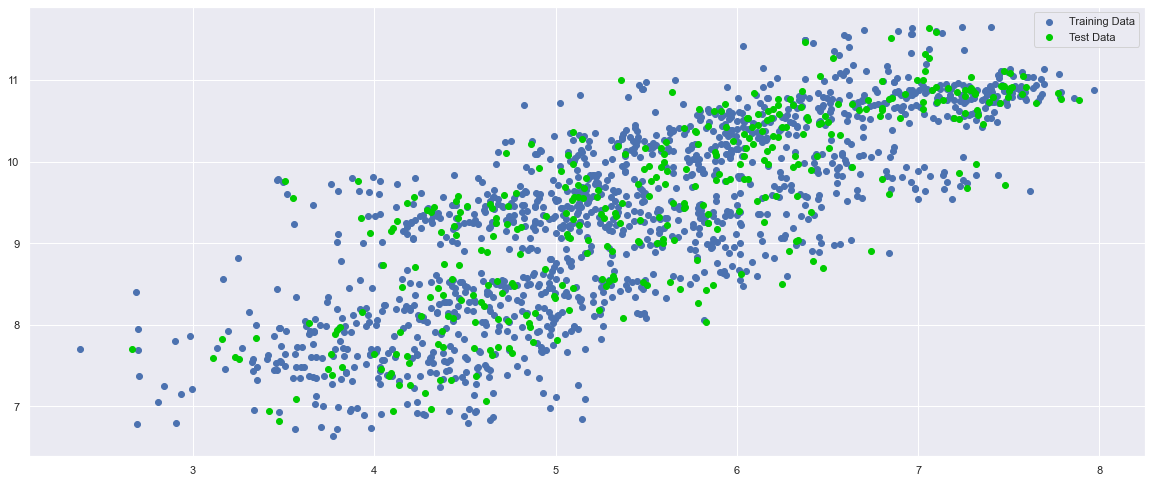

In [40]:
plt.scatter(HIRTrainingYears.LL, HIRTrainingYears['GDP'], label='Training Data')
plt.scatter(HIRTestingYears.LL, HIRTestingYears['GDP'], color='#00CC00', label='Test Data')
plt.legend();

### Training

In [42]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(HIRTrainingYears.LL, HIRTrainingYears['GDP'])
## Running the linea regression with training DataSet, using LL and GDP, the metric with the highest corelation

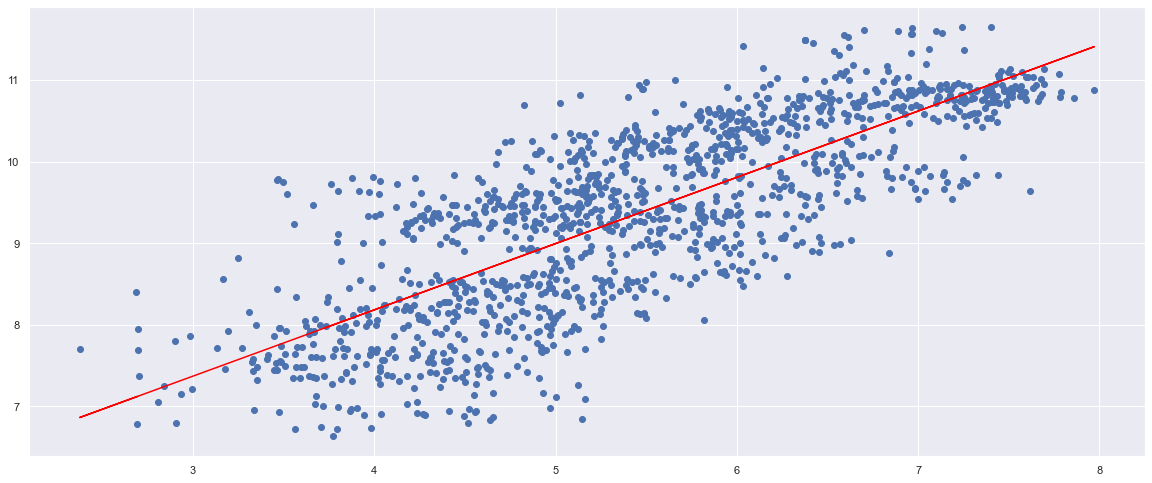

In [43]:
train_regr = intercept + slope*HIRTrainingYears.LL
train_regr
plt.scatter(HIRTrainingYears.LL, HIRTrainingYears['GDP'])
plt.plot(HIRTrainingYears.LL, train_regr, color='red');

In [44]:
##R2 Score Training
metrics.r2_score(HIRTrainingYears['GDP'], train_regr)

0.6175440480393601

In [47]:
## MAE Training
metrics.mean_absolute_error(HIRTrainingYears['GDP'], train_regr)

0.5854144277051091

### Testing

In [48]:
##R2 Score Test
metrics.r2_score(HIRTestingYears['GDP'], intercept + slope*HIRTestingYears.LL)

0.6319301736247382

In [49]:
## MAE Test
metrics.mean_absolute_error(HIRTestingYears['GDP'], intercept + slope*HIRTestingYears.LL)

0.5459530352506993

### Both the measures improved on the test data: $R^2$ got closer to $1$, and the MAE reduced in size. 

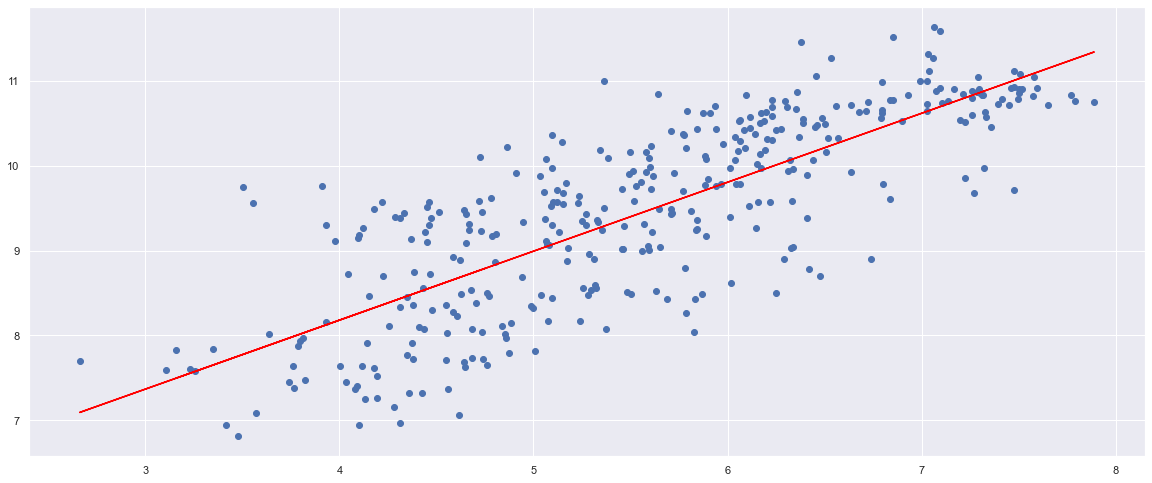

In [50]:
train_regr = intercept + slope*HIRTestingYears.LL
train_regr
plt.scatter(HIRTestingYears.LL, HIRTestingYears['GDP'])
plt.plot(HIRTestingYears.LL, train_regr, color='red');

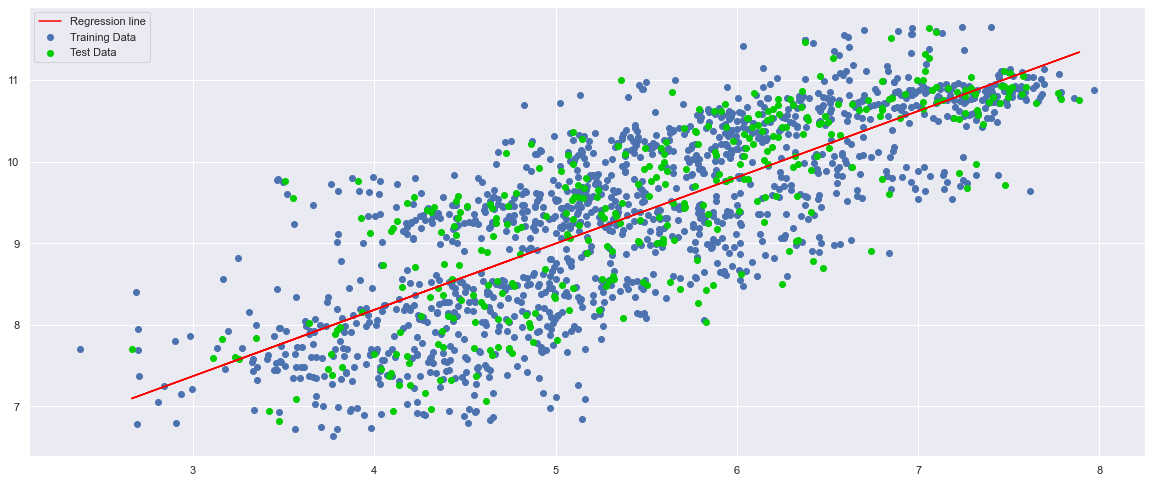

In [51]:
plt.scatter(HIRTrainingYears.LL, HIRTrainingYears['GDP'], label='Training Data')
plt.scatter(HIRTestingYears.LL, HIRTestingYears['GDP'], color='#00CC00', label='Test Data')
plt.plot(HIRTestingYears.LL, train_regr, color='red',label='Regression line');plt.legend();